# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = None
minimum_price = np.min(prices)
# TODO: Maximum price of the data
maximum_price = None
maximum_price = np.max(prices)
# TODO: Mean price of the data
mean_price = None
mean_price = np.mean(prices)
# TODO: Median price of the data
median_price = None
median_price = np.median(prices)
# TODO: Standard deviation of prices of the data
std_price = None
std_price = np.std(prices)
# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Answer: **

* An increase in RM would definintely increase the MEDV as more room leads to more people occupancy and lead to more options for all indivisuals.
* LSTAT might lead to decrease as people might take the notion that the area is lacking vibrance and output of money flow.
* A high PTRATIO would definitely lead to high increase in owners as people always look for more number of teachers as it leads to more options for schools.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score #importing r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.1 | 5.5 |
| -0.6 | 0.0 |
| 7.0 | 8.1 |
| 7.2 | 1.8 |
| 8.2 | 2.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [18]:
# Calculating the performance of this model
# Using a new set of values:
score = performance_metric([3.1, -0.6, 7.0, 7.2, 8.2], [5.5, 0.0, 8.1, 1.8, 2.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of -0.319.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

Yes i would consider the model succesful as i ran the code with many variations and the values were correct.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=33)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer: **

1) The model didn´t learn well on the data, and can’t predict even the outcomes of the training set, this is called underfitting and it is caused because a high bias.

2) The model learn too well the training data, up to the point that it memorized it and is not able to generalize on new data, this is called overfitting, it is caused because high variance.

3) The model just had the right balance between bias and variance, it learned well and is able predict correctly the outcomes on new data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

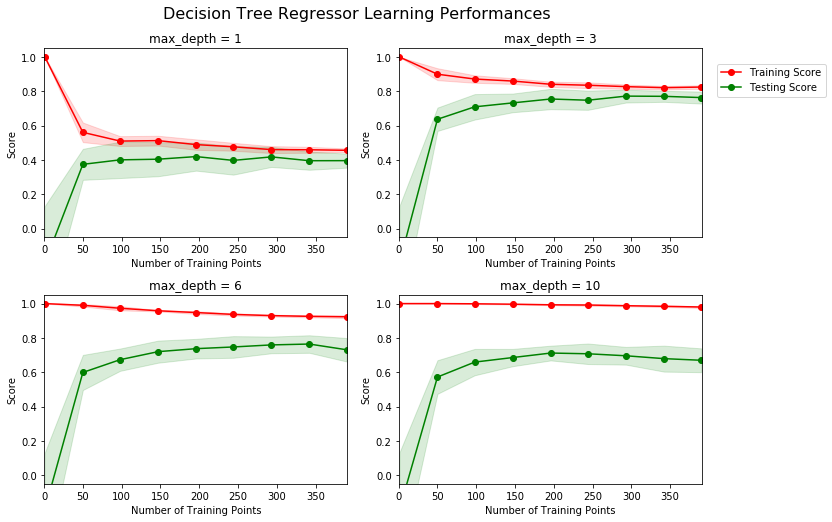

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer: **

Choice: max depth - 3 graph.

Reason: As we add more training points, its score decreases, but unlike "max depth-1" the decrease rate is quite minimal, and further, it seems to level off. The variance of the curve  is also decreasing.

As seen in the graph, increasing number of training points only make a respectable change till (300,0.8) hence it would be unnecessary to continue adding training points).

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

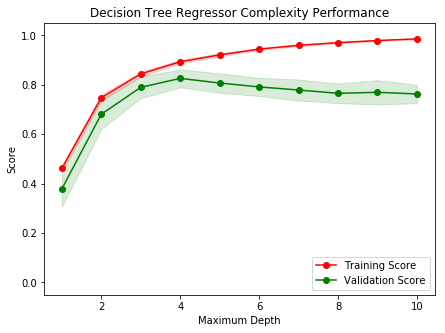

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer: **

At maximum depth 1:
(Visual cues)
* training score is less.
* validation score is less.
hence the model suffers from "high bias". (Underfitting)

At maximum depth 10:
(Visual cues)
* Increased trainig score.
* Increased validation score.
hence the model suffers from "high variance" (Overfitting)

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer: **

I believe that a maximum depth of 4 would lead to a best generalization as:
* In max-depth 3 the curves coincide but there is still a small gap between the curves, at a slighty higher validation score from 3 and a closer level of uncertainty of the validation and training curve.

Though the graph shows otherwise, i am taking into consideration of the final value which might compenstae due to differnet variabilities.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer: **

The Grid Search is a powerful way to optimize the process of fitting Estimators. Parameters that describe how the learning process should be performed are vital to the quality of the resulting model. Unfortunately, it’s often difficult to guess what the best values for them are.

The Grid Search operation allows us to specify a set of values for the parameters of the input Estimator. The operation then goes through every combination of parameters from specified sets and for each one the Estimator is fitted and the resulting trained model is evaluated by means of cross validation.

The goal of Grid Search is to choose the best combination of parameters, where “best” is defined as having received the highest grade from the Evaluator.

In order to grade a particular combination of parameters, the Estimator is fitted number of folds times. In each “round” of training, the input dataset is divided into training and test parts. The model fitted on the training data is used to score the test part of the dataset. This score is evaluated and the final grade of the parameter combination is the average score from all folds.

The result of the Grid Search operation is a Report in which every combination of parameters is graded by the Evaluator.

Parameters of the Grid Search operation mirror the parameters of its input Estimator, but some of them accept multiple, comma-separated values.

Application to optimize a learning algorithm:

Grid as mentioned above is commenly used to identify good model complexities.

We in fact, applied it above in the task about the complexity curve. In that task, we did not know which value of max_depth is best for the decision tree applied to the Boston housing dataset. We defined a grid over the max_depth values [1, 2, ..., 10] and evaluated decision tree performance for each value from 1 to 10. This allowed us to estimate the relationship between max_depth and the scores. We used our knowledge of this relationship to choose a good value for max_depth by looking for a max_depth value for which increasing it does not improve the scores significantly anymore.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer: **

The k-fold cross-validation technique involves randomly dividing the dataset into k groups or folds of approximately equal size. The first fold is kept for testing and the model is trained on k-1 folds.

There the k stands for the number of groups.

The general procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
Take the group as a hold out or test data set
Take the remaining groups as a training data set
Fit a model on the training set and evaluate it on the test set
Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores



Benefits of k-fold cross validation technique for grid search:

K-Fold Cross-Validation can be used to evaluate performance of a model by handling the variance problem of the result set. Furthermore, to identify the best algorithm and best parameters, we can use the Grid Search algorithm.

The cross-validation sets the basis to compile a grid search.

### Implementation: Fitting a Model

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=41)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)
    
    """Utilization of grid search as mentioned and anserwed in question number 7"""

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal Model as a maximum depth of 4.

This result is same as the prediction i had done above. It was expected as i had suggested the reasons as to why the outcome would be 4, though i am a bit surprised as the graph had shown a bit different of a approach.

### Question 10 - Predicting Selling Prices
Imagining that i am a real estate agent in the Boston area looking to use this model to help price homes owned by my clients that they wish to sell. I have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

Run the code block below to have your optimized model make predictions for each client's home.

In [16]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

print("The predictions/recommended selling price for clients:")
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

The predictions/recommended selling price for clients:
Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


**Answer: **

Price Justification:
    
    Client 1) As there is a high STRATIO and 5 rooms the price seems to be perfect, there could've been a greater deal but the poverty percentage brings it down.
    
    Client 2)  Though there is a high STRATIO the extremely high poverty percentage greatly brings down the price though there are 4 rooms to offer, the poverty percentage plays a major role as the reason is mentioned above.
    
    Client 3) This would be an ideal house and i would expect a 100,000 dollar increase to the price as the poverty percentage is close to null and there are decent enough teachers with a massive space for 8 rooms. Any family would consider this a dream house.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [17]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Answer: **

1) "According to the U.S. Bureau of Labor Statistics, prices in Boston, Massachusetts were 321.20% higher in 2019 versus 1978 (a $64.24 difference in value).

Between 1978 and 2019: Boston experienced an average inflation rate of 3.57 percent per year. This rate of change indicates significant inflation. In other words, $20 in Boston in the year 1978 would cost 84.24 dollars in 2019 for an equivalent purchase. Compared to the overall inflation rate of 3.35 percent during this same period, inflation in Boston was higher.

In the year 1978: Pricing changed by 5.34 percetnt, which is above the average yearly change in Boston during the 1978-2019 time period. Compared to inflation for all items in 1978 (7.63 percent), inflation in Boston was lower."

This piece of information from the U.S. Bureau of Labor Statistics proves that there is major difference we have to account for while we set the prices of the house, therefore the constructed model that has been generated would be void.

2)The features we have taken into consideration are good enough, a major difference wouldn't take place with the change of labels but the tax rate should be taken into account.

3)The Model is robust to an extent to make a very good prediction as we have discussed above, but as there is a good increase of population which indicates more values from the program to take in, values might become dsitorted after point.

4)The data collected here will have a very narrow relation to a rural city as the factors have to be changed and the poverty levels will be too high and we will have to focus on a different crowd and different type of houses.

5)There are several neighnourhoods within a city therefore it would be fair to judge the price of an indiviual house depending on the neighbouhood. It applies in my very own city as well and many of the different cities where my friends reside.